# THREAT DETECTION IN CLOUD SYSTEM
Name:

Matric Number:

School:

Faculty:

Department:

Supervisor:

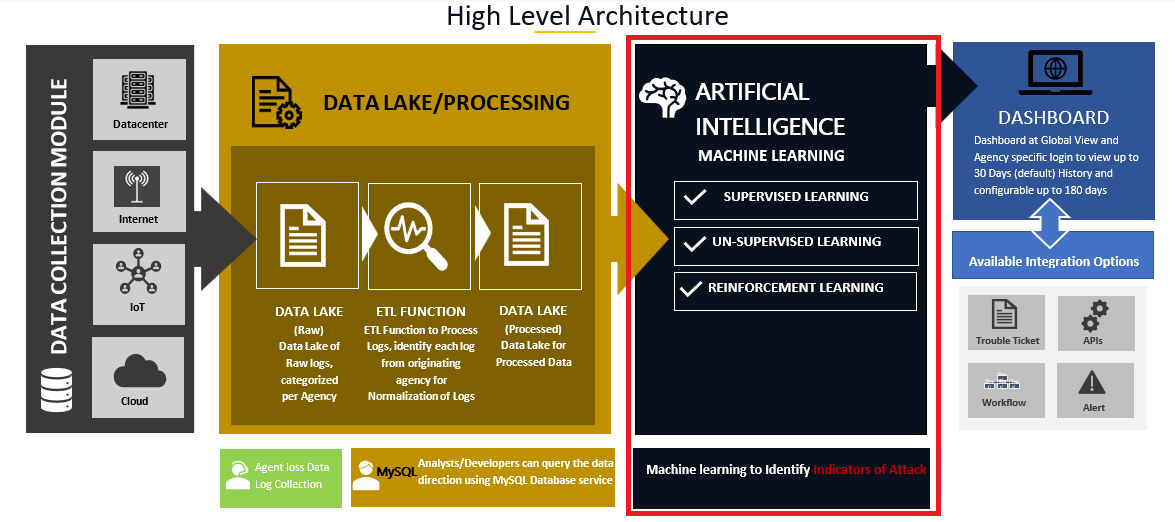

this section shows the full documentation and of the AI model used to detect the threat in the cloud system. I decided to use machine learning model rather than using Deep learning model as i realise after several researches and iteration that maching learning model is able to do a perfect prediction of the threat as you will see in the notebook

Inorder to get the best model for my research i used `pycaret, pandas, numpy, seaborn, matplotlib, and sklearn `

**PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive.** [(PyCaret, 2020)](https://pycaret.readthedocs.io/en/latest/index.html)

**Pandas offers data structure and operations for powerful, flexible, and easy-to-use data analysis and manipulation.** [(Pandas, 2008)](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)

**NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.**[(Numpy, 2005)](https://numpy.org/)

**Seaborn is a Python library built on top of the popular visualization library, Matplotlib. It aims to enhance the visual appeal and ease of use of Matplotlib by providing a higher-level interface for creating statistical graphics.**[(Seaborn, 2012)](https://seaborn.pydata.org/whatsnew/v0.12.0.html)

**Matplotlib is a Python library used for creating data visualizations. It is used with Numpy to create publication quality plots.**[(Matplotlib, 2003)](https://matplotlib.org/)

**Sklearn implements numerous data modeling and machine learning algorithms, and provides consistent Python APIs. It supports a standardized and concise model interface across models.**[(Sklearn, 2010)](https://scikit-learn.org/stable/)


In [ ]:
# installing the necessary library to use for our research
!pip install -Uq pycaret
!pip install -q shap
!pip install -q pycaret[analysis]
!pip install -q pandas
!pip install -q numpy
!pip install -q seaborn
!pip install -q matplotlib
!pip install -q sklearn

In [2]:
# importing the necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pycaret.classification import *
from sklearn.preprocessing import OneHotEncoder
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


In [3]:
# Importing the data
# Specify the path to the CSV file
data = pd.read_csv(r"conn4_log_labeled.csv")
data.head()

,#types,time,string,addr,port,addr.1,port.1,enum,string.1,interval,...,bool.1,count.2,string.3,count.3,count.4,count.5,count.6,set[string],string.4,string.5
0,1526756261.8665,C9YvmJ3zxtuqxWxLW5,192.168.2.5,38792.0,200.168.87.203,59353.0,tcp,-,2.998333,0,...,0.0,S,3.0,180.0,0.0,0.0,(empty),Malicious,PartOfAHorizontalPortScan,NaN
1,1526756268.874876,CGsZqZ3UiQexLzPRVb,192.168.2.5,38792.0,200.168.87.203,59353.0,tcp,-,-,-,...,0.0,S,1.0,60.0,0.0,0.0,(empty),Malicious,PartOfAHorizontalPortScan,NaN
2,1526756272.877722,C0LkBW2VEa292Nvet8,192.168.2.5,38793.0,200.168.87.203,59353.0,tcp,-,2.997182,0,...,0.0,S,3.0,180.0,0.0,0.0,(empty),Malicious,PartOfAHorizontalPortScan,NaN
3,1526756279.884959,CMDLrn2cVhrqvW8gKa,192.168.2.5,38793.0,200.168.87.203,59353.0,tcp,-,-,-,...,0.0,S,1.0,60.0,0.0,0.0,(empty),Malicious,PartOfAHorizontalPortScan,NaN
4,1526756283.888751,C2UM8f4knuL5Vnvp3h,192.168.2.5,38794.0,200.168.87.203,59353.0,tcp,-,2.996286,0,...,0.0,S,3.0,180.0,0.0,0.0,(empty),Malicious,PartOfAHorizontalPortScan,NaN


In [4]:
# If you want to reset the index of the selected sample
data.reset_index(drop=True, inplace=True)
# Display the selected random sample
data.columns



Index(['#types', 'time', 'string', 'addr', 'port', 'addr.1', 'port.1', 'enum',
       'string.1', 'interval', 'count', 'count.1', 'string.2', 'bool',
       'bool.1', 'count.2', 'string.3', 'count.3', 'count.4', 'count.5',
       'count.6', 'set[string]', 'string.4', 'string.5'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS
I will be checking our data to clean the missing values and futher choosing the feature that will be used for our prediction

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156104 entries, 0 to 156103
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   #types       156104 non-null  object 
 1   time         156104 non-null  object 
 2   string       156103 non-null  object 
 3   addr         156103 non-null  float64
 4   port         156103 non-null  object 
 5   addr.1       156103 non-null  float64
 6   port.1       156103 non-null  object 
 7   enum         156103 non-null  object 
 8   string.1     156103 non-null  object 
 9   interval     156103 non-null  object 
 10  count        156103 non-null  object 
 11  count.1      156103 non-null  object 
 12  string.2     156103 non-null  object 
 13  bool         156103 non-null  object 
 14  bool.1       156103 non-null  float64
 15  count.2      156103 non-null  object 
 16  string.3     156103 non-null  float64
 17  count.3      156103 non-null  float64
 18  count.4      156103 non-

### cleaning the dataset

In [6]:
data['set[string]'].value_counts()

set[string]
Malicious    151567
Benign         4536
Name: count, dtype: int64

From our data we realised that our target variable is 'set[string]' and when we futher check the number of each variable in value count we realized that there are 151567 value of malicious in the dataset and 4536 value of Benign in the dataset, this is very imbalance data sample so we will have to create a balanced data so that our prediction will not be over fitting for the prediction we are trying to acheive. we will be using the value of the Benign for Malicious

In [7]:
# creating variable for both malicious and benign
malicious = data[data['set[string]'] == 'Malicious']
benign = data[data['set[string]'] == 'Benign']

In [8]:
# using the sample of the benign to create that of the malicious to give a balanced datase
malicious_sample = malicious.sample(n=len(benign), random_state=42)
malicious_sample.shape
balanced_data = pd.concat([benign, malicious_sample], axis=0)
balanced_data['set[string]'].value_counts()
balanced_data = balanced_data.drop(['string.5'], axis=1)
df = balanced_data

### Feature Engineering

On futher investigation on our data we realize that all the dataset can't be used so we will have to used the useful once

In [9]:
# Choosing the useful columns in the dataset
df_column = ['string', 'port', 'port.1',
       'addr', 'addr.1']

data_sub = df[df_column]


categorical_list = []
for col in data_sub.columns:
    if data_sub[col].dtype == 'object':
        categorical_list.append(col)
    else:
      pass
categorical_list
# categorical_list.remove('set[string]')
# categorical_list

['string', 'port', 'port.1']

In [10]:
# seperating the numerical type so that the object type can be change to float for perfect prediction using LabelEncoder
selected_data = df[df_column]
numerical_list = selected_data.select_dtypes(include=['float64']).columns
numerical_list

Index(['addr', 'addr.1'], dtype='object')

Using LabelEncoder to change the column that are string to floats so that it can be used for prediction as sklearn can't us string for its prediction

In [14]:
# Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical columns
# encoded_features = encoder.fit_transform(df[categorical_list])

# Convert the encoded features to a DataFrame
# encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_list))

# Concatenate the encoded columns with the original dataset excluding the original categorical columns
# data_encoded = pd.concat([df[numerical_list], encoded_df, df['set[string]']], axis=1)
# Identify categorical columns

encoders = {}

# Encode each categorical column separately
for col in categorical_list:
  encoder = LabelEncoder()
  encoder.fit(df[col])
  df[col] = encoder.transform(df[col])
  encoders[col] = encoder  # Save encoder for later use (optional)

# Concatenate the encoded features with the original dataset
data_encoded_unclean = pd.concat([df[numerical_list], df[categorical_list], df['set[string]']], axis=1)
data_encoded_unclean.head()

,addr,addr.1,string,port,port.1,set[string]
13,123.0,123.0,359,6029,2,Benign
14,123.0,123.0,359,5527,2,Benign
15,123.0,123.0,359,5193,2,Benign
22,123.0,123.0,359,5528,2,Benign
29,123.0,123.0,359,5193,2,Benign


In [19]:
# we need to change the name of the code
# Because of the kind of name that is gotten from scapy
data_encoded_unclean['src_ip'] = data_encoded_unclean['string']
data_encoded_unclean['dst_ip'] = data_encoded_unclean['port']
data_encoded_unclean['proto'] = data_encoded_unclean['port.1']
data_encoded_unclean['src_port'] = data_encoded_unclean['addr']
data_encoded_unclean['dst_port'] = data_encoded_unclean['addr.1']

data_name = ['src_ip', 'dst_ip','proto', 'src_port', 'dst_port','set[string]']

data_encoded = data_encoded_unclean[data_name]
data_encoded.head()

,src_ip,dst_ip,proto,src_port,dst_port,set[string]
13,359,6029,2,123.0,123.0,Benign
14,359,5527,2,123.0,123.0,Benign
15,359,5193,2,123.0,123.0,Benign
22,359,5528,2,123.0,123.0,Benign
29,359,5193,2,123.0,123.0,Benign


## DATA PREDICTION
For this section we will be predicting using pycaret that has over 18 model and we will be comparing all the model then choose the best 2 model and visualize it so that we will get a full picture of how the prediction is going

In [20]:
# Remove rows with missing values in the target column
data_encoded = data_encoded.dropna(subset=['set[string]'])
# Initialize PyCaret with the encoded dataset
clf_setup = setup(data=data_encoded, target='set[string]')

# Compare models and get the top 2 models
top_models = compare_models(n_select=2)

# Select the best model
best_model = top_models[0]

# Train the best model on the entire dataset
final_model = finalize_model(best_model)

# Make predictions
predictions = predict_model(final_model)


# Select the next best model (second-best model)
next_best_model = top_models[1]

# Finalize the next best model
final_next_best_model = finalize_model(next_best_model)

# Make predictions
predictions_next = predict_model(final_next_best_model)


,Description,Value
0,Session id,8294
1,Target,set[string]
2,Target type,Binary
3,Target mapping,"Benign: 0, Malicious: 1"
4,Original data shape,"(9072, 6)"
5,Transformed data shape,"(9072, 6)"
6,Transformed train set shape,"(6350, 6)"
7,Transformed test set shape,"(2722, 6)"
8,Numeric features,5
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8460,0.8460,0.8460,0.8461,0.8460,0.6920,0.6921,0.1060
rf,Random Forest Classifier,0.8370,0.9258,0.8370,0.8377,0.8369,0.6740,0.6747,1.0480
lightgbm,Light Gradient Boosting Machine,0.8345,0.9255,0.8345,0.8355,0.8344,0.6690,0.6700,0.4530
gbc,Gradient Boosting Classifier,0.8219,0.9219,0.8219,0.8232,0.8217,0.6438,0.6451,0.8450
et,Extra Trees Classifier,0.8143,0.9097,0.8143,0.8151,0.8142,0.6287,0.6294,0.6800
ada,Ada Boost Classifier,0.8140,0.9038,0.8140,0.8154,0.8138,0.6280,0.6294,0.4400
knn,K Neighbors Classifier,0.7757,0.8566,0.7757,0.7768,0.7755,0.5515,0.5525,0.4570
nb,Naive Bayes,0.7013,0.7601,0.7013,0.7308,0.6913,0.4025,0.4309,0.0850
ridge,Ridge Classifier,0.6910,0.7649,0.6910,0.7004,0.6873,0.3820,0.3912,0.2270
lda,Linear Discriminant Analysis,0.6910,0.7649,0.6910,0.7004,0.6873,0.3820,0.3912,0.3020


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


for this code we can see that some model predicted a perfect result like Naive Bayes,
Decision Tree Classifier, Random Forest Classifier, Ada Boost Classifier, Gradient Boosting Classifier, Extra Trees Classifier, Extreme Gradient Boosting, Light Gradient Boosting Machine. this model got 100% accuracy for the prediction, so we will be using the best two of this which is the *Naive Bayes Classifier and Decision Tree Classifier* as it came top on the list


In [21]:
# prompt: for values in data_encoded['set[string]'] i want Malicious to be 1 and benign to be 0 then they should be stored in another column called target

data_encoded['target'] = data_encoded['set[string]'].apply(lambda x: 1 if x == 'Malicious' else 0)
data_encoded.drop('set[string]', axis=1, inplace=True)
data_encoded.head()


,src_ip,dst_ip,proto,src_port,dst_port,target
13,359,6029,2,123.0,123.0,0
14,359,5527,2,123.0,123.0,0
15,359,5193,2,123.0,123.0,0
22,359,5528,2,123.0,123.0,0
29,359,5193,2,123.0,123.0,0


## Evaluation of the two model

In [22]:
# help(plot_model)

Navies Bayes


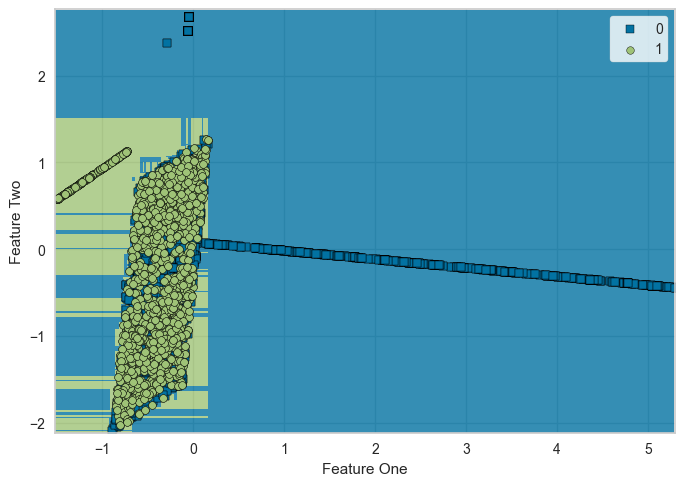

Decision Tree Classifier


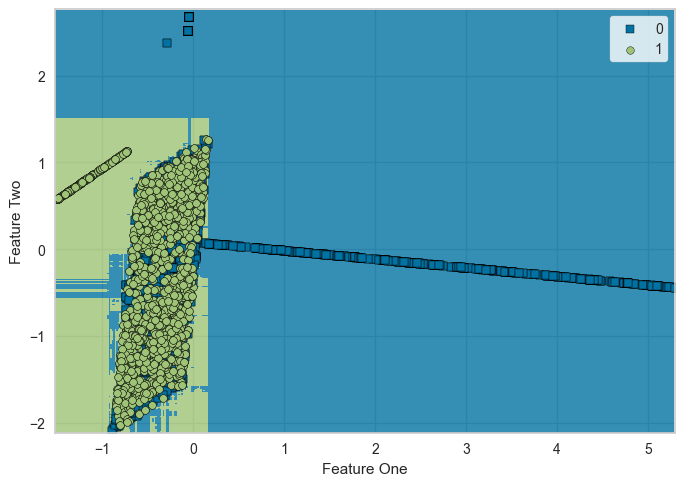

In [23]:
# Import the plot_model function
from pycaret.classification import plot_model

# Visualize the model
print('Navies Bayes')
plot_model(final_model, plot='boundary')
print('Decision Tree Classifier')
plot_model(final_next_best_model, plot='boundary')

From this model we see that Navies Bayes Classifier only capture one side of the dataset and did not capture the second area of the attack in the dataset, but the Decision tree classifier captures both sides.  so eventhough both of the model predicted 100% the diagram shows that when more data are inputted it is likely for the Navies bayes not to capture the Malicious from the network well.

so we will be using the Decision Tree Classifer for our prediction

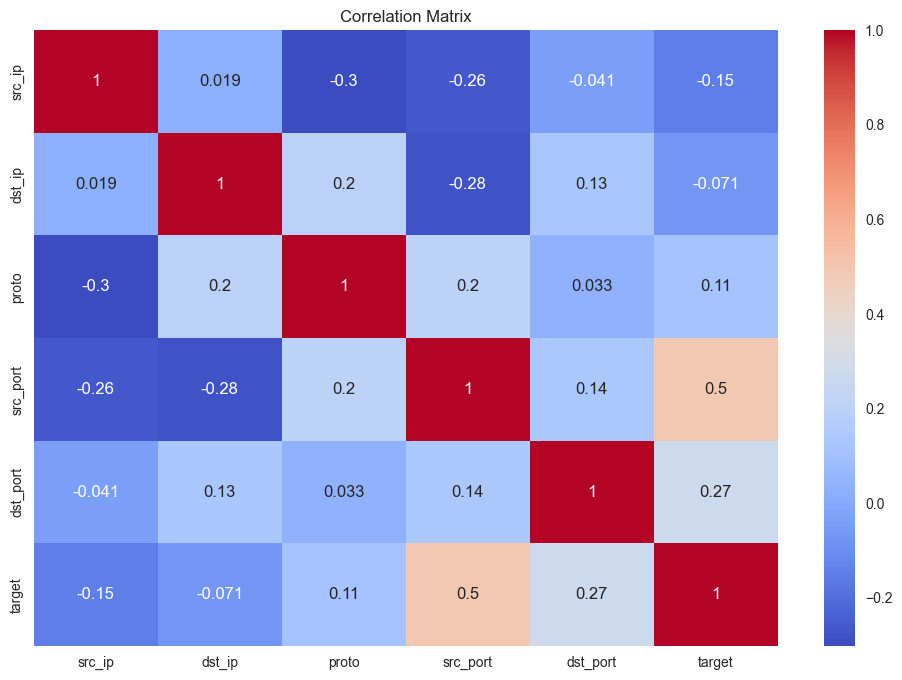

In [24]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The correlation matrix shows the relationship of the columns in the dataset, as we see our major target is the "Target" variable and we see how each features worked with it

## SAVING OUR MODEL FOR DEPLOYMENT

In [25]:
# Save (pickle) the best model
save_model(final_model, 'next_best_model')

# (Optional) Load the saved model
loaded_model = load_model('next_best_model')

# Make predictions
predictions = predict_model(loaded_model)

# Display the predicted results
print("Predicted Results:")
predictions.head()

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Predicted Results:


,src_ip,dst_ip,proto,src_port,dst_port,set[string],prediction_label,prediction_score
26851,359,5371,1,54731.0,22.0,Malicious,Malicious,1.0
47752,359,1968,1,41277.0,22.0,Malicious,Malicious,1.0
8417,359,6029,2,123.0,123.0,Benign,Benign,1.0
33923,359,4159,1,57303.0,59353.0,Malicious,Malicious,1.0
117947,359,5642,1,53313.0,22.0,Malicious,Malicious,1.0


## REFERENCES

McKinney, W. (2010). Data Structures for Statistical Computing in Python. In Proceedings of the 9th Python in Science Conference, 51-56. Retrieved from https://pandas.pydata.org/docs/

Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585(7825), 357-362. Retrieved from https://numpy.org/doc/

Waskom, M. (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021. Retrieved from https://seaborn.pydata.org/

Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. Retrieved from https://matplotlib.org/stable/contents.html

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830. Retrieved from https://scikit-learn.org/stable/documentation.html

Ali, M., Jabeen, F., & ur Rehman, S. (2020). PyCaret: An open source, low-code machine learning library in Python. Retrieved from https://pycaret.readthedocs.io/en/latest/


In [83]:
print("""
░██████╗███████╗░█████╗░██████╗░███████╗
██╔════╝██╔════╝██╔══██╗██╔══██╗██╔════╝
╚█████╗░█████╗░░██║░░██║██████╔╝█████╗░░
░╚═══██╗██╔══╝░░██║░░██║██╔══██╗██╔══╝░░
██████╔╝███████╗╚█████╔╝██║░░██║███████╗
╚═════╝░╚══════╝░╚════╝░╚═╝░░╚═╝╚══════╝
""")



░██████╗███████╗░█████╗░██████╗░███████╗
██╔════╝██╔════╝██╔══██╗██╔══██╗██╔════╝
╚█████╗░█████╗░░██║░░██║██████╔╝█████╗░░
░╚═══██╗██╔══╝░░██║░░██║██╔══██╗██╔══╝░░
██████╔╝███████╗╚█████╔╝██║░░██║███████╗
╚═════╝░╚══════╝░╚════╝░╚═╝░░╚═╝╚══════╝

